In [1]:
%matplotlib widget 
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt


In [2]:
ID = '72'
sector_tpf = 'sector' + ID + '/sector'+ID+'_tp.fits'
sector_lcf = 'sector' + ID + '/sector'+ID+'_lc.fits'

In [3]:
fits.info(sector_tpf)

Filename: sector72/sector72_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   18292R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [4]:
tphdu = fits.open(sector_tpf)

In [5]:
tphdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

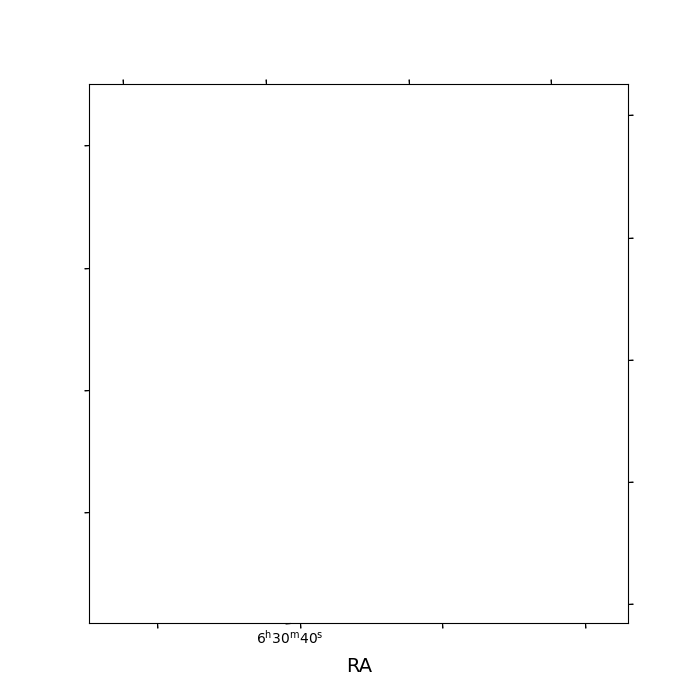

In [6]:
tphdu = fits.open(sector_tpf)
tpf_data = tphdu[1].data
first_image = tpf_data['FLUX'][0]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize = (7,7))
fig.add_subplot(111, projection = wcs)
plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 14)
plt.ylabel(r'Dec', fontsize = 14)
plt.grid(axis = 'both', color = 'white', ls = 'solid')

plt.show()

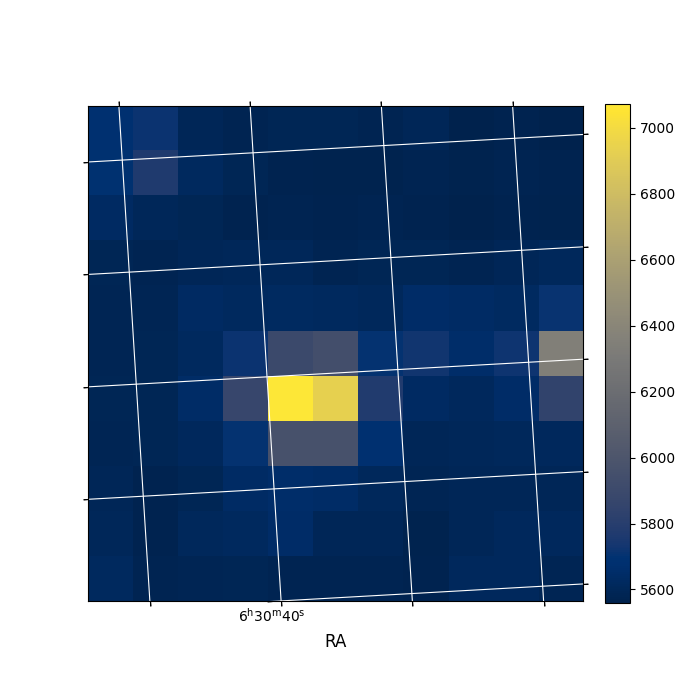

In [7]:
tpf_data = tphdu[1].data

for i_check in range(0, len(tpf_data['TIME'])):
    if np.isfinite(tpf_data['FLUX'][i_check][0,0]):
      break


first_image = tpf_data['FLUX'][i_check]

#The aperture extension header contains the same WCS as that in the Pixels extension.
wcs = WCS(tphdu[2].header)

#Plot the first image in the file.
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111,projection=wcs)
im = plt.imshow(first_image, origin='lower', cmap = plt.colormaps['cividis'])
plt.xlabel(r'RA', fontsize = 12)
plt.ylabel(r'Dec', fontsize = 12)
plt.grid(axis = 'both', color = 'white', ls = 'solid')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.show()

In [8]:
ap_image = (tphdu[2].data)
print(ap_image)

[[129 133 129 133 133 133 133 133 129 129 129]
 [129 133 129 129 129 129 133 133 133 129 129]
 [129 133 129 129 129 129 129 133 133 129 129]
 [133 133 129 129 139 139 129 129 129 129 129]
 [133 129 129 139 139 139 139 129 129 129 129]
 [133 133 129 139 139 139 129 129 129 129 129]
 [129 133 129 129 129 129 129 129 129 129 129]
 [129 133 129 129 129 133 133 129 133 129 129]
 [129 129 133 133 133 133 133 133 133 129 129]
 [129 129 129 129 129 129 129 129 129 129 129]
 [129 129 129 129 129 129 129 129 129 129 129]]


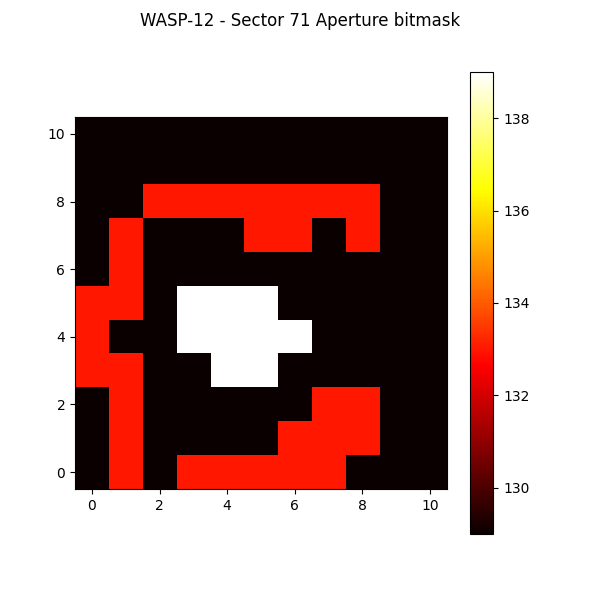

In [9]:
aperture = tphdu[2].data

# Start figure and axis.
fig, ax = plt.subplots(figsize=(6,6))

cbx = ax.imshow(aperture, cmap=plt.cm.hot, origin="lower", alpha=1.0)

# Let's define a title for the figure.
fig.suptitle("WASP-12 - Sector 71 Aperture bitmask")

# Add a color bar.
cbar = fig.colorbar(cbx)
plt.show()

In [10]:
fits.info(sector_lcf)

Filename: sector72/sector72_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18292R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [11]:
lchdu = fits.open(sector_lcf)
lchdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [12]:
tsap_flux = lchdu[1].data['SAP_FLUX']
tsap_flux_error = lchdu[1].data['SAP_FLUX_ERR']
tpdcsap_flux = lchdu[1].data['PDCSAP_FLUX']
tpdcsap_flux_error = lchdu[1].data['PDCSAP_FLUX_ERR']
quality_bitmask = lchdu[1].data['QUALITY']
fits.info(sector_lcf)

Filename: sector72/sector72_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18292R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [13]:
print('BJDREFI header value:  {1:d}, comment: {0:s}'.format(lchdu[1].header.comments['BJDREFI'], lchdu[1].header['BJDREFI']))
print('BJDREFF header value: {1:f}, comment: {0:s}'.format(lchdu[1].header.comments['BJDREFF'], lchdu[1].header['BJDREFF']))


BJDREFI header value:  2457000, comment: integer part of BTJD reference date
BJDREFF header value: 0.000000, comment: fraction of the day in BTJD reference date


In [14]:
time_array = lchdu[1].data['TIME'] + lchdu[1].header['BJDREFI'] +  lchdu[1].header['BJDREFF']


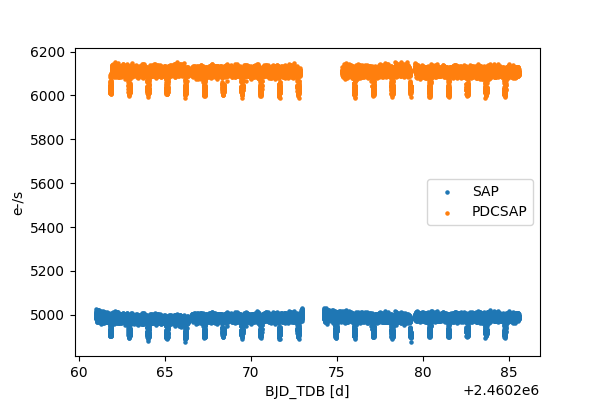

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(time_array, tsap_flux, s=5, label='SAP')
plt.scatter(time_array, tpdcsap_flux, s=5, label='PDCSAP')
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.legend()
plt.show()

In [16]:
finite_selection = np.isfinite(tpdcsap_flux)

In [17]:
conservative_selection =  ~(quality_bitmask > 0) & finite_selection

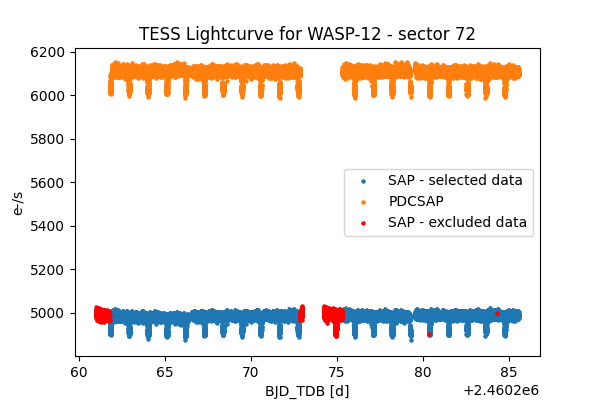

In [18]:
# Plot with exluded data conservative selection

plt.figure(figsize=(6,4))
plt.scatter(time_array[conservative_selection], tsap_flux[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(time_array, tpdcsap_flux, s=5, label='PDCSAP')
plt.scatter(time_array[~conservative_selection], tsap_flux[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.errorbar(time_array[conservative_selection], tsap_flux[conservative_selection],
            yerr=tsap_flux_error[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for WASP-12 - sector "+ID, fontsize = 12)

plt.legend()
plt.show()


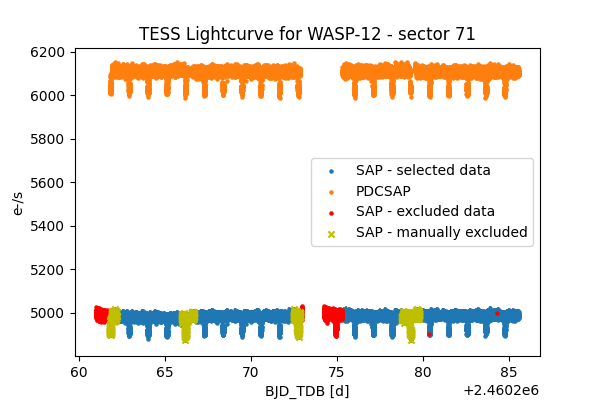

In [19]:

final_selection = conservative_selection & (time_array > 2460262.2) & ~((time_array < 2460266.7) & (time_array > 2460266)) & ~((time_array < 2460279.8) & (time_array > 2460278.8)) & ~((time_array < 2460273.2) & (time_array > 2460272.5))

plt.figure(figsize=(6,4))
plt.scatter(time_array[conservative_selection], tsap_flux[conservative_selection],
            s=5, label='SAP - selected data')
plt.scatter(time_array, tpdcsap_flux, s=5, label='PDCSAP')


plt.scatter(time_array[~conservative_selection], tsap_flux[~conservative_selection],
            s=5, c='r', label='SAP - excluded data')
plt.scatter(time_array[~final_selection & conservative_selection], tsap_flux[~final_selection & conservative_selection],
            s=20, c='y', marker='x', label='SAP - manually excluded')
plt.errorbar(time_array[conservative_selection], tsap_flux[conservative_selection],
            yerr=tsap_flux_error[conservative_selection], fmt=' ', alpha=0.5, 
            ecolor='k', zorder=-1)
plt.xlabel('BJD_TDB [d]')
plt.ylabel('e-/s')
plt.title("TESS Lightcurve for WASP-12 - sector 71", fontsize = 12)

plt.legend()
plt.show()

In [20]:
from wotan import flatten 

In [21]:
time = time_array[final_selection]
sap_flux =  tsap_flux[final_selection]
sap_flux_error = tsap_flux_error[final_selection]

pdcsap_flux =  tpdcsap_flux[final_selection]
pdcsap_flux_error = tpdcsap_flux_error[final_selection]

In [22]:
# From ExoFOP website

Transit_time = 2458842.99
Period = 1.0914304469578
Transit_window = 3.051* 2 /24. 

In [23]:
sap_flatten_flux, sap_flatten_model = flatten(
    time,                   # Array of time values
    sap_flux,               # Array of flux values
    method='biweight',
    window_length=0.5,      # The knot distance in units of ``time``
    break_tolerance=0.5,    # Split into segments at breaks longer than that
    return_trend = True     # Return trend and flattened light curve
)

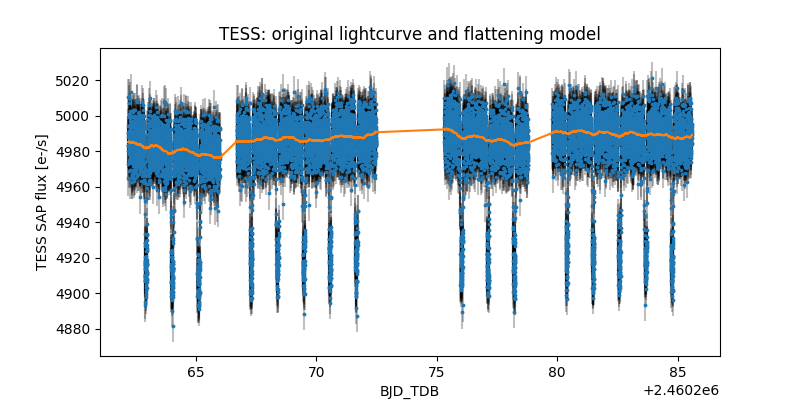

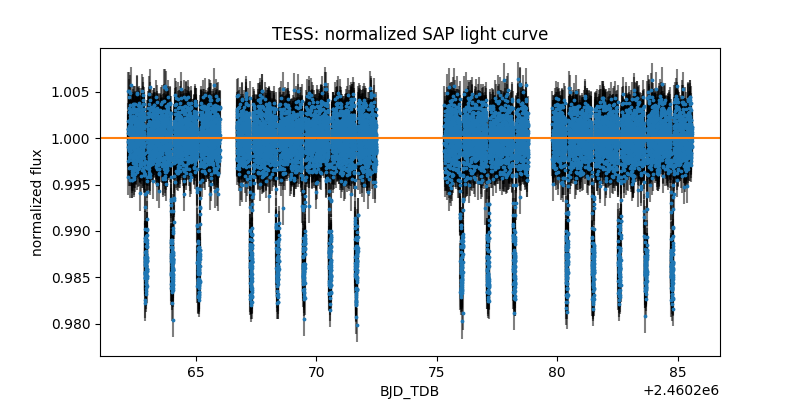

In [24]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model')
plt.scatter(time, sap_flux, c='C0', s=3)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', fmt=' ', alpha=0.25, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [e-/s]')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(time, sap_flatten_flux, c='C0', s=3)
plt.errorbar(time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('BJD_TDB')
plt.ylabel('normalized flux')
plt.axhline(1.000, c='C1')
plt.show()

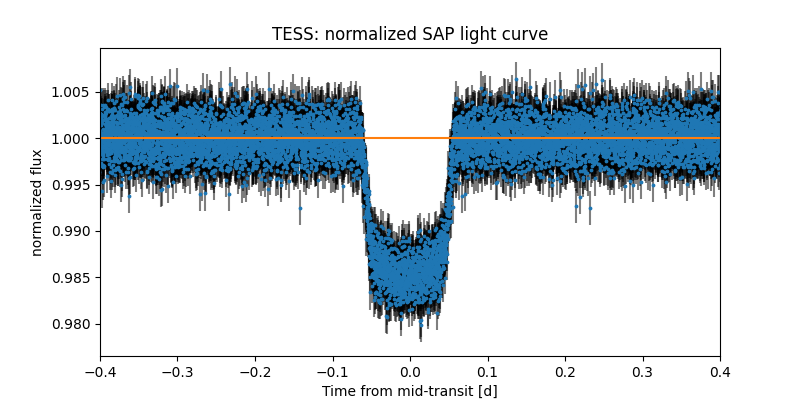

In [25]:
phase_folded_time = (time-Transit_time - Period/2)%Period - Period/2

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(phase_folded_time, sap_flatten_flux, c='C0', s=3)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.axhline(1.000, c='C1')
plt.show()

In [26]:
# Light just before the transit goes up, algorithm is including some points 
# belonging to the trnasit when computing the model

In [27]:
# Transit Mask 

from wotan import transit_mask
mask = transit_mask(
    time=time,
    period = Period,
    duration = Transit_window,
    T0=Transit_time 
)

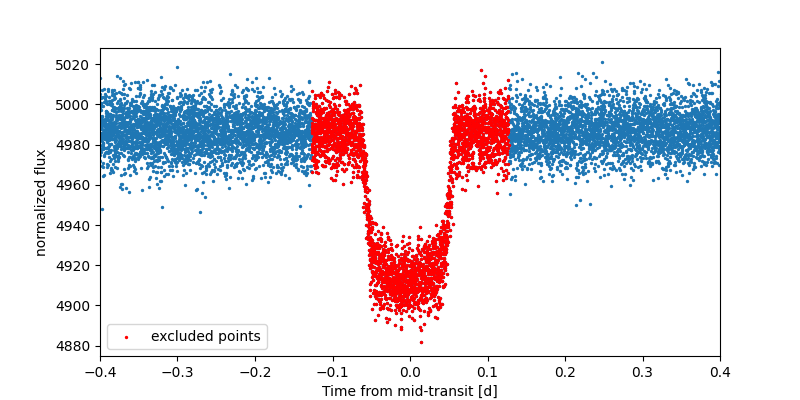

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(phase_folded_time, sap_flux, s=2)
plt.scatter(phase_folded_time[mask], sap_flux[mask], c='r', zorder=1, s=2, label='excluded points')
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.legend()
plt.show() 

In [29]:
sap_masked_flatten_flux, sap_masked_flatten_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=0.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

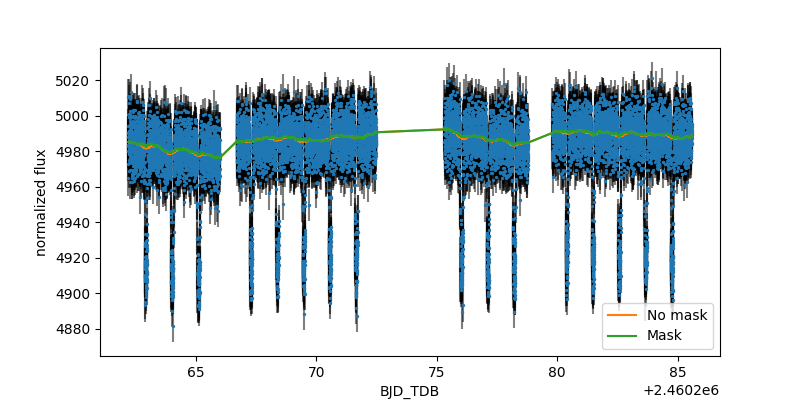

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, c='C0', s=2)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10, label='No mask')
plt.plot(time, sap_masked_flatten_model, c='C2', zorder=11, label='Mask')
plt.xlabel('BJD_TDB')
plt.ylabel('normalized flux')
plt.legend()
plt.show()

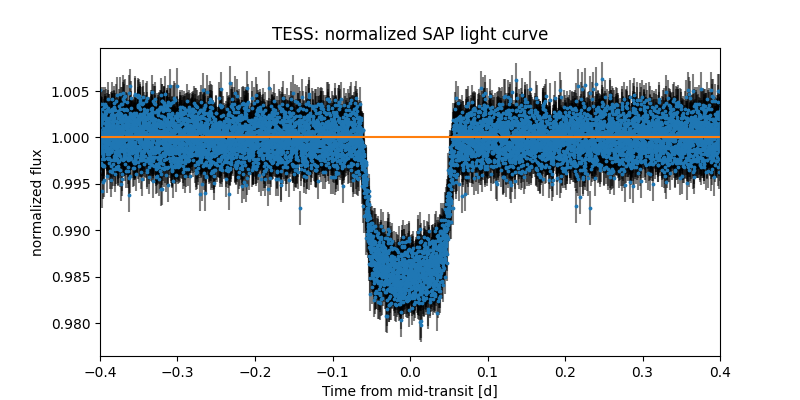

In [31]:
plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(phase_folded_time, sap_masked_flatten_flux, c='C0', s=3)
plt.errorbar(phase_folded_time, sap_masked_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.axhline(1.000, c='C1')
plt.show()

In [32]:
print('STD with mask   : {0:.6f}'.format(np.std(sap_masked_flatten_flux[~mask])))
print('STD without mask: {0:.6f}'.format(np.std(sap_flatten_flux[~mask])))
print('Median SAP error outside the transit: {0:0.6f}'.format( np.median(
    sap_flux_error[~mask]/sap_flatten_model[~mask])))

STD with mask   : 0.001826
STD without mask: 0.001825
Median SAP error outside the transit: 0.001831


In [33]:
sap_masked_biweight_w025_flux, sap_masked_biweight_w025_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=0.25, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_biweight_w05_flux, sap_masked_biweight_w05_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=0.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_biweight_w10_flux, sap_masked_biweight_w10_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_biweight_w15_flux, sap_masked_biweight_w15_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [34]:
print('STD SAP biweight, window=0.25: {0:.6f}'.format(np.std(sap_masked_biweight_w025_flux[~mask])))
print('STD SAP biweight, window=0.5: {0:.6f}'.format(np.std(sap_masked_biweight_w05_flux[~mask])))
print('STD SAP biweight, window=1.0: {0:.6f}'.format(np.std(sap_masked_biweight_w10_flux[~mask])))
print('STD SAP biweight, window=1.5: {0:.6f}'.format(np.std(sap_masked_biweight_w15_flux[~mask])))


STD SAP biweight, window=0.25: 0.001819
STD SAP biweight, window=0.5: 0.001826
STD SAP biweight, window=1.0: 0.001827
STD SAP biweight, window=1.5: 0.001828


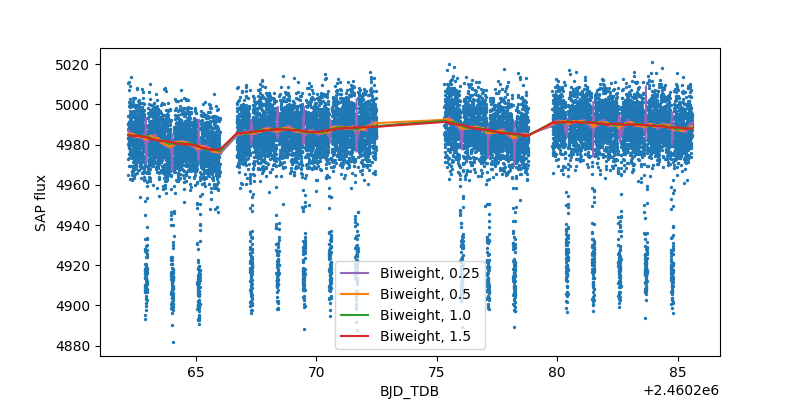

In [35]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, s=2)
plt.plot(time, sap_masked_biweight_w025_model, c='C4', zorder=10, label='Biweight, 0.25')
plt.plot(time, sap_masked_biweight_w05_model, c='C1', zorder=10, label='Biweight, 0.5')
plt.plot(time, sap_masked_biweight_w10_model, c='C2', zorder=11, label='Biweight, 1.0')
plt.plot(time, sap_masked_biweight_w15_model, c='C3', zorder=12, label='Biweight, 1.5')
plt.xlabel('BJD_TDB')
plt.ylabel('SAP flux')

plt.legend()
plt.show() 

In [36]:
# Visualinspection shows that anything above .5 window length is good, we stick with 0.5

In [37]:
pdcsap_masked_biweight_w025_flux, pdcsap_masked_biweight_w025_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=0.25, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)
pdcsap_masked_biweight_w05_flux, pdcsap_masked_biweight_w05_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=0.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

pdcsap_masked_biweight_w10_flux, pdcsap_masked_biweight_w10_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

pdcsap_masked_biweight_w15_flux, pdcsap_masked_biweight_w15_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [38]:
print('STD PDCSAP biweight, window=0.25: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w025_flux[~mask])))
print('STD PDCSAP biweight, window=0.5: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w05_flux[~mask])))
print('STD PDCSAP biweight, window=1.0: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w10_flux[~mask])))
print('STD PDCSAP biweight, window=1.5: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w15_flux[~mask])))


STD PDCSAP biweight, window=0.25: 0.001827
STD PDCSAP biweight, window=0.5: 0.001835
STD PDCSAP biweight, window=1.0: 0.001835
STD PDCSAP biweight, window=1.5: 0.001836


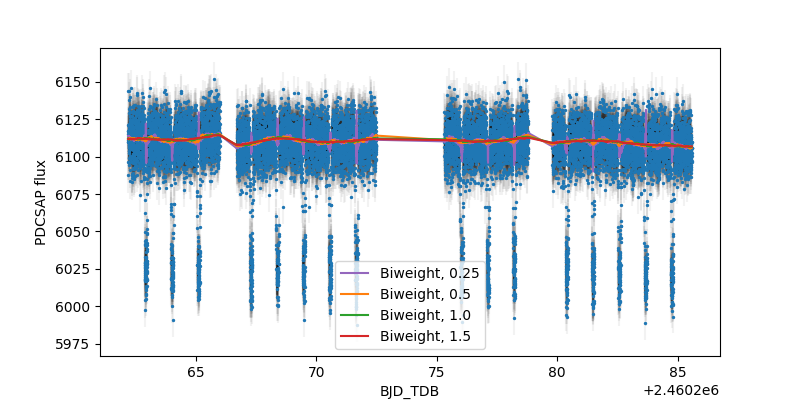

In [39]:
plt.figure(figsize=(8,4))
plt.scatter(time, pdcsap_flux, s=2)
plt.errorbar(time, pdcsap_flux, yerr=pdcsap_flux_error, ecolor='k', fmt=' ', alpha=0.05, zorder=-1)
plt.plot(time, pdcsap_masked_biweight_w025_model, c='C4', zorder=10, label='Biweight, 0.25')
plt.plot(time, pdcsap_masked_biweight_w05_model, c='C1', zorder=10, label='Biweight, 0.5')
plt.plot(time, pdcsap_masked_biweight_w10_model, c='C2', zorder=11, label='Biweight, 1.0')
plt.plot(time, pdcsap_masked_biweight_w15_model, c='C3', zorder=12, label='Biweight, 1.5')
plt.xlabel('BJD_TDB')
plt.ylabel('PDCSAP flux')

plt.legend()
plt.show() 

In [40]:
# same result as above for the pdcsap flux

In [41]:
print('average normalized error: {0:.6f}'.format(
    np.average(pdcsap_flux_error[~mask]/pdcsap_masked_biweight_w05_model[~mask])))

average normalized error: 0.001868


In [42]:
# Let's do another filtering method only on pdcsap flux HUBER
!pip install statsmodels

In [43]:
pdcsap_masked_huber_w025_flux, pdcsap_masked_huber_w025_model = flatten(
    time,
    pdcsap_flux,
    method='huber',
    window_length=0.25, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)
pdcsap_masked_huber_w05_flux, pdcsap_masked_huber_w05_model = flatten(
    time,
    pdcsap_flux,
    method='huber',
    window_length=0.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

pdcsap_masked_huber_w10_flux, pdcsap_masked_huber_w10_model = flatten(
    time,
    pdcsap_flux,
    method='huber',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

pdcsap_masked_huber_w15_flux, pdcsap_masked_huber_w15_model = flatten(
    time,
    pdcsap_flux,
    method='huber',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

/home/thomas/anaconda3/envs/astrolab2/lib/python3.9/site-packages/statsmodels/robust/scale.py:297: RuntimeWarning: invalid value encountered in sqrt
  nscale = np.sqrt(scale_num / scale_denom)


In [44]:
print('STD PDCSAP huber, window=0.25: {0:.6f}'.format(np.std(pdcsap_masked_huber_w025_flux[~mask])))
print('STD PDCSAP huber, window=0.5: {0:.6f}'.format(np.std(pdcsap_masked_huber_w05_flux[~mask])))
print('STD PDCSAP huber, window=1.0: {0:.6f}'.format(np.std(pdcsap_masked_huber_w10_flux[~mask])))
print('STD PDCSAP huber, window=1.5: {0:.6f}'.format(np.std(pdcsap_masked_huber_w15_flux[~mask])))


STD PDCSAP huber, window=0.25: 0.001826
STD PDCSAP huber, window=0.5: 0.001834
STD PDCSAP huber, window=1.0: 0.001834
STD PDCSAP huber, window=1.5: 0.001836


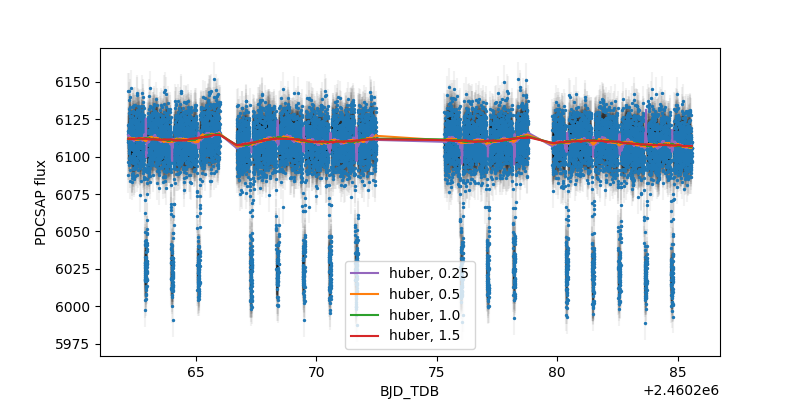

In [45]:
plt.figure(figsize=(8,4))
plt.scatter(time, pdcsap_flux, s=2)
plt.errorbar(time, pdcsap_flux, yerr=pdcsap_flux_error, ecolor='k', fmt=' ', alpha=0.05, zorder=-1)
plt.plot(time, pdcsap_masked_huber_w025_model, c='C4', zorder=10, label='huber, 0.25')
plt.plot(time, pdcsap_masked_huber_w05_model, c='C1', zorder=10, label='huber, 0.5')
plt.plot(time, pdcsap_masked_huber_w10_model, c='C2', zorder=11, label='huber, 1.0')
plt.plot(time, pdcsap_masked_huber_w15_model, c='C3', zorder=12, label='huber, 1.5')
plt.xlabel('BJD_TDB')
plt.ylabel('PDCSAP flux')

plt.legend()
plt.show() 

In [46]:
import pickle 

sector72_dictionary = {
    'time': time_array[final_selection],
    'sap_flux': sap_flux,
    'sap_flux_error': sap_flux_error,
    'pdcsap_flux': pdcsap_flux,
    'pdcsap_flux_error': pdcsap_flux_error,
    'selected_flux': pdcsap_masked_biweight_w05_flux,
    'selected_flux_error': pdcsap_flux_error/pdcsap_masked_biweight_w05_model,
}

pickle.dump(sector72_dictionary, 
            open('WASP-12_TESS_sector072_selected.p','wb'))